# Titanic

### Richiesta
Esempio di applicazione di algoritmi di ML utilizzando un dataset famoso  
Il dataset da noi utilizzato è [Titanic](https://www.kaggle.com/competitions/titanic). Lo scopo di questo dataset è quello di predire se un passeggero si è salvato o meno analizzado i dati che abbiamo su di lui.

### Soluzione
La guida schematizzata qui sotto è stata realizzata prendendo ispirazione da [una guida fornita dal sito ufficiale della competizione](https://www.kaggle.com/code/startupsci/titanic-data-science-solutions/notebook)

#### Import delle librerie

Queste librerie saranno utilizzate nel corso di tutta l'analisi

In [1]:
!pip install pandas
!pip install seaborn
!pip install sklearn

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [2]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
!pip install sklearn
!pip install -U scikit-learn scipy matplotlib


Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [4]:

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

#### Lettura del dataset
Grazie alla funzione *read_csv* di pandas possiamo leggere agilmente il file csv ed inserirlo all'interno di un *DataFrame*


In [5]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
combine = [train_df, test_df]

#### In alternativa utilizzo un dataset completo e lo divido

In [6]:
df = pd.read_csv("titanic.csv")
df.rename(columns={
    "pclass":     "Pclass",
    'survived':   'Survived',
    'name':       "Name",
    'sex':        'Sex',
    'age':        "Age",
    'sibsp':      "SibSp",
    'parch':      "Parch",
    'ticket':     "Ticket",
    'fare':       "Fare",
    'cabin':      "Cabin",
    'embarked':   "Embarked",
            },inplace=True)
df.drop(columns=['boat', 'body', 'home.dest'], inplace=True)

train_df, test_df = train_test_split(df)
combine = [train_df, test_df]


#### Stampo le etichette delle colonne e le prime righe
Questo è utile per capire cosa contiene il nostro dataset

In [7]:
print(train_df.columns.values)
train_df.head(20)

['Pclass' 'Survived' 'Name' 'Sex' 'Age' 'SibSp' 'Parch' 'Ticket' 'Fare'
 'Cabin' 'Embarked']


,Pclass,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1039,3.0,1.0,"Mullens, Miss. Katherine ""Katie""",female,NaN,0.0,0.0,35852,7.7333,NaN,Q
712,3.0,0.0,"Celotti, Mr. Francesco",male,24.0,0.0,0.0,343275,8.0500,NaN,S
1051,3.0,0.0,"Nancarrow, Mr. William Henry",male,33.0,0.0,0.0,A./5. 3338,8.0500,NaN,S
871,3.0,0.0,"Horgan, Mr. John",male,NaN,0.0,0.0,370377,7.7500,NaN,Q
146,1.0,1.0,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1.0,0.0,PC 17572,76.7292,D33,C
1299,3.0,0.0,"Yasbeck, Mr. Antoni",male,27.0,1.0,0.0,2659,14.4542,NaN,C
442,2.0,0.0,"Hickman, Mr. Leonard Mark",male,24.0,2.0,0.0,S.O.C. 14879,73.5000,NaN,S
387,2.0,1.0,"Davies, Mrs. John Morgan (Elizabeth Agnes Mary...",female,48.0,0.0,2.0,C.A. 33112,36.7500,NaN,S
1185,3.0,0.0,"Samaan, Mr. Hanna",male,NaN,2.0,0.0,2662,21.6792,NaN,C
537,2.0,0.0,"Ponesell, Mr. Martin",male,34.0,0.0,0.0,250647,13.0000,NaN,S


#### Ottengo informazioni sul nostro dataset

In [8]:
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 982 entries, 1039 to 342
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    981 non-null    float64
 1   Survived  981 non-null    float64
 2   Name      981 non-null    object 
 3   Sex       981 non-null    object 
 4   Age       783 non-null    float64
 5   SibSp     981 non-null    float64
 6   Parch     981 non-null    float64
 7   Ticket    981 non-null    object 
 8   Fare      981 non-null    float64
 9   Cabin     217 non-null    object 
 10  Embarked  981 non-null    object 
dtypes: float64(6), object(5)
memory usage: 92.1+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
Index: 328 entries, 53 to 610
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    328 non-null    float64
 1   Survived  328 non-null    float64
 2   Name      328 non-null    object 


In [9]:
train_df.describe()
# Review survived rate using `percentiles=[.61, .62]` knowing our problem description mentions 38% survival rate.
# Review Parch distribution using `percentiles=[.75, .8]`
# SibSp distribution `[.68, .69]`
# Age and Fare `[.1, .2, .3, .4, .5, .6, .7, .8, .9, .99]`

,Pclass,Survived,Age,SibSp,Parch,Fare
count,981.000000,981.000000,778.000000,981.000000,981.000000,980.000000
mean,2.287462,0.382263,29.940017,0.486239,0.382263,34.055173
std,0.843302,0.486188,14.440252,1.058042,0.837666,53.617608
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000
25%,1.000000,0.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.458300
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.387500
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200


In [10]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,981,981,981,223,979
unique,979,2,741,158,3
top,"Connolly, Miss. Kate",male,CA. 2343,F33,S
freq,2,625,9,4,683


#### Faccio analisi
In questa fase analizzo la correlazione tra varie colonne (attributi) e cerco di ricavarci qualcosa.
Queste informazioni, più avanti, dovrò espicitarle per farle risaltare meglio

In [9]:
train_df[['Pclass', 'Survived']]\
    .groupby(['Pclass'], as_index=False)\
    .mean()\
    .sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1.0,0.626050
1,2.0,0.415525
2,3.0,0.244275


In [10]:
train_df[["Sex", "Survived",'Pclass']].groupby(['Sex','Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Pclass,Survived
0,female,1.0,0.971429
1,female,2.0,0.871795
2,female,3.0,0.483871
3,male,1.0,0.353383
4,male,2.0,0.163121
5,male,3.0,0.143631


In [13]:
train_df[["SibSp", "Survived"]]\
.groupby(['SibSp'], as_index=False)\
.mean()\
.sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1.0,0.525424
2,2.0,0.407407
0,0.0,0.348597
3,3.0,0.153846
4,4.0,0.125000
5,5.0,0.000000
6,8.0,0.000000


In [14]:
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
1,1.0,0.609023
2,2.0,0.517647
3,3.0,0.500000
0,0.0,0.329317
4,4.0,0.200000
5,5.0,0.200000
6,6.0,0.000000
7,9.0,0.000000


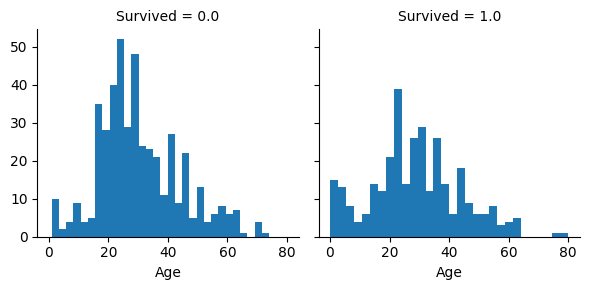

In [15]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=30)

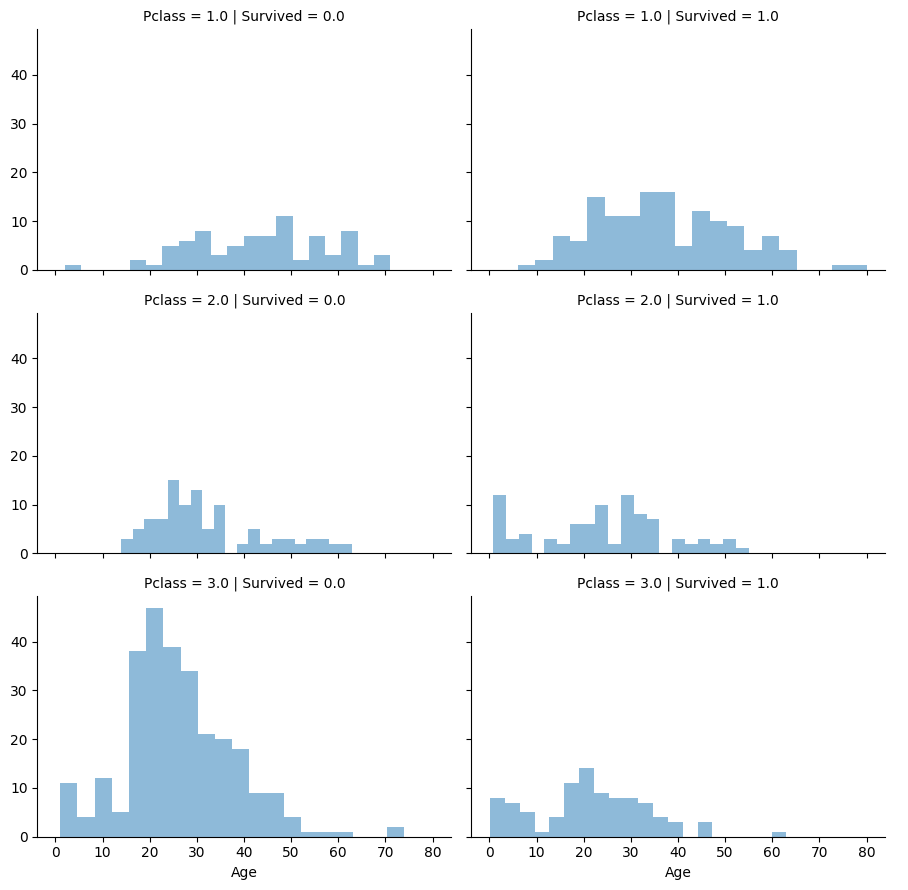

In [16]:
#
#grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass',  aspect=1.5) #size=2.2,
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

/home/vscode/.local/lib/python3.12/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/vscode/.local/lib/python3.12/site-packages/seaborn/axisgrid.py:723: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


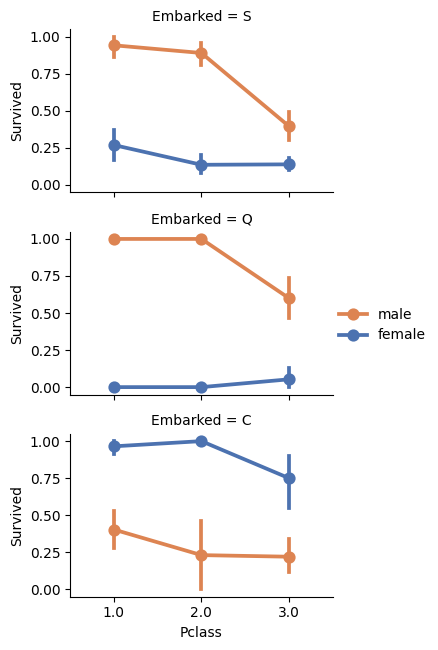

In [17]:
# grid = sns.FacetGrid(train_df, col='Embarked')
grid = sns.FacetGrid(train_df, row='Embarked', height=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

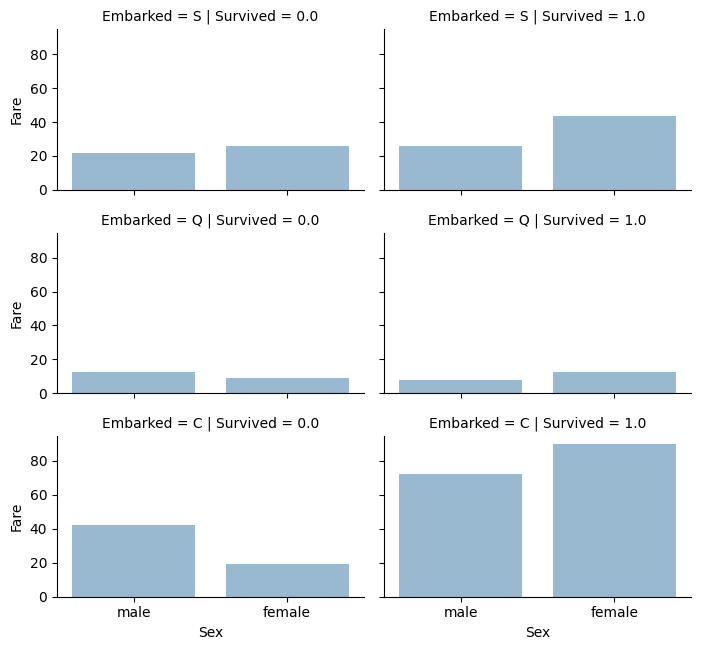

In [18]:
# grid = sns.FacetGrid(train_df, col='Embarked', hue='Survived', palette={0: 'k', 1: 'w'})
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', height=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, errorbar=None,order=None)
grid.add_legend()

In [19]:
print("Before", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)
# Droppo Ticket e cabina perchè non abbiamo abbastanza info a riguardo
train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_df, test_df]

print("After", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

Before (982, 11) (328, 11) (982, 11) (328, 11)
After (982, 9) (328, 9) (982, 9) (328, 9)


#### Estraggo informazioni
In questo caso estraggio il titolo del passeggero partendo dal nome

In [13]:
train_df.head()

,Pclass,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
1039,3.0,1.0,"Mullens, Miss. Katherine ""Katie""",female,NaN,0.0,0.0,35852,7.7333,NaN,Q,Miss
712,3.0,0.0,"Celotti, Mr. Francesco",male,24.0,0.0,0.0,343275,8.0500,NaN,S,Mr
1051,3.0,0.0,"Nancarrow, Mr. William Henry",male,33.0,0.0,0.0,A./5. 3338,8.0500,NaN,S,Mr
871,3.0,0.0,"Horgan, Mr. John",male,NaN,0.0,0.0,370377,7.7500,NaN,Q,Mr
146,1.0,1.0,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1.0,0.0,PC 17572,76.7292,D33,C,Mrs


In [12]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(" ([A-Za-z]+)\.", expand=False)

pd.crosstab(train_df['Title'], train_df['Sex'])

<>:2: SyntaxWarning: invalid escape sequence '\.'
<>:2: SyntaxWarning: invalid escape sequence '\.'
/tmp/ipykernel_556/682817900.py:2: SyntaxWarning: invalid escape sequence '\.'
  dataset['Title'] = dataset.Name.str.extract(" ([A-Za-z]+)\.", expand=False)


Sex,female,male
Title,,
Capt,0,1
Col,0,4
Don,0,1
Dona,1,0
Dr,0,6
Jonkheer,0,1
Major,0,2
Master,0,46
Miss,198,0


#### Pulisco il titolo

In [14]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

#### Analizzo la percentuale di salvataggio rispetto al titolo

In [15]:
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.500000
1,Miss,0.676617
2,Mr,0.162021
3,Mrs,0.794118
4,Rare,0.333333


#### Converto il titolo in un numero

In [16]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train_df.head()

,Pclass,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
1039,3.0,1.0,"Mullens, Miss. Katherine ""Katie""",female,NaN,0.0,0.0,35852,7.7333,NaN,Q,2.0
712,3.0,0.0,"Celotti, Mr. Francesco",male,24.0,0.0,0.0,343275,8.0500,NaN,S,1.0
1051,3.0,0.0,"Nancarrow, Mr. William Henry",male,33.0,0.0,0.0,A./5. 3338,8.0500,NaN,S,1.0
871,3.0,0.0,"Horgan, Mr. John",male,NaN,0.0,0.0,370377,7.7500,NaN,Q,1.0
146,1.0,1.0,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1.0,0.0,PC 17572,76.7292,D33,C,3.0


#### Rimuovo features non più necessarie

In [17]:
train_df = train_df.drop(['Name', 'PassengerId'], axis=1,errors='ignore')
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

((982, 11), (328, 11))

#### Converto il sesso in un  numero

In [18]:
for dataset in combine:
    dataset.dropna(subset=['Sex'],inplace=True)
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

train_df.head()

,Pclass,Survived,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
1039,3.0,1.0,1,NaN,0.0,0.0,35852,7.7333,NaN,Q,2.0
712,3.0,0.0,0,24.0,0.0,0.0,343275,8.0500,NaN,S,1.0
1051,3.0,0.0,0,33.0,0.0,0.0,A./5. 3338,8.0500,NaN,S,1.0
871,3.0,0.0,0,NaN,0.0,0.0,370377,7.7500,NaN,Q,1.0
146,1.0,1.0,1,49.0,1.0,0.0,PC 17572,76.7292,D33,C,3.0


In [19]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 981 entries, 1039 to 342
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    981 non-null    float64
 1   Survived  981 non-null    float64
 2   Sex       981 non-null    int64  
 3   Age       783 non-null    float64
 4   SibSp     981 non-null    float64
 5   Parch     981 non-null    float64
 6   Ticket    981 non-null    object 
 7   Fare      981 non-null    float64
 8   Cabin     217 non-null    object 
 9   Embarked  981 non-null    object 
 10  Title     981 non-null    float64
dtypes: float64(7), int64(1), object(3)
memory usage: 92.0+ KB


Age è nulla molte volte, devo aggiustare questa cosa

#### Analizzo basandomi su classe e sesso

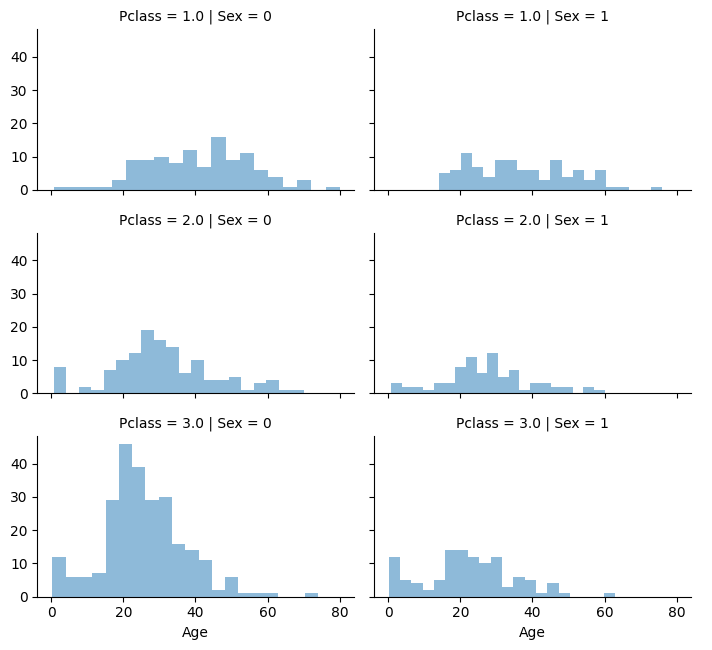

In [20]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Gender')
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

In [29]:
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

#### Calcolo le età medie per ogni classe / sesso

In [30]:
for dataset in combine:
    for i in (0,1):
        for j in (0,1,2):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5

#### Riempio i valori nulli di età con l'età media calcolata prima

In [31]:
for dataset in combine:
    for i in (0,1):
        for j in (0,1,2):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]
    # Imposto il tipo di dato di Age ad intero
    dataset['Age'] = dataset['Age'].astype(int)

train_df.head()

,Pclass,Survived,Sex,Age,SibSp,Parch,Fare,Embarked,Title
521,2.0,1.0,1,29,0.0,0.0,10.5000,S,3.0
822,3.0,0.0,0,41,0.0,0.0,7.8500,S,1.0
761,3.0,0.0,0,16,0.0,0.0,9.5000,S,1.0
477,2.0,0.0,0,30,0.0,0.0,10.7083,Q,1.0
633,3.0,0.0,0,20,0.0,0.0,7.8542,S,1.0


#### Assegno ad ogni passeggero la sua fascia di età (di 5)

In [32]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

/tmp/ipykernel_776/987560108.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)


,AgeBand,Survived
0,"(-0.08, 16.0]",0.588235
1,"(16.0, 32.0]",0.326821
2,"(32.0, 48.0]",0.425439
3,"(48.0, 64.0]",0.400000
4,"(64.0, 80.0]",0.250000


####
 Assegno ad ogni fascia di età un unico numero identificativo
Da questo momento Age conterrà valori da 1 a 5 in base alla fascia d'età del *passeggero*

In [33]:
for dataset in combine:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4
train_df.head()

,Pclass,Survived,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
521,2.0,1.0,1,1,0.0,0.0,10.5000,S,3.0,"(16.0, 32.0]"
822,3.0,0.0,0,2,0.0,0.0,7.8500,S,1.0,"(32.0, 48.0]"
761,3.0,0.0,0,0,0.0,0.0,9.5000,S,1.0,"(-0.08, 16.0]"
477,2.0,0.0,0,1,0.0,0.0,10.7083,Q,1.0,"(16.0, 32.0]"
633,3.0,0.0,0,1,0.0,0.0,7.8542,S,1.0,"(16.0, 32.0]"


#### Rimuovo la colonna AgeBand

In [34]:
train_df = train_df.drop(['AgeBand'], axis=1)
combine = [train_df, test_df]
train_df.head()

,Pclass,Survived,Sex,Age,SibSp,Parch,Fare,Embarked,Title
521,2.0,1.0,1,1,0.0,0.0,10.5000,S,3.0
822,3.0,0.0,0,2,0.0,0.0,7.8500,S,1.0
761,3.0,0.0,0,0,0.0,0.0,9.5000,S,1.0
477,2.0,0.0,0,1,0.0,0.0,10.7083,Q,1.0
633,3.0,0.0,0,1,0.0,0.0,7.8542,S,1.0


#### Creo la colonna FamilySize contenente numero di Fratelli/Sorelle/Mogli + Figli/Genitori ed analizzo

In [35]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4.0,0.677419
1,2.0,0.573964
2,3.0,0.569106
0,1.0,0.296667
4,5.0,0.285714
6,7.0,0.230769
5,6.0,0.117647
7,8.0,0.000000
8,11.0,0.000000


#### Creo la feature IsAlore
Vale 1 se è solo, 0 se ha familiari

In [36]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.517060
1,1,0.296667


#### Rimuovo le features che ora non servono più

In [37]:
train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train_df, test_df]

train_df.head()

,Pclass,Survived,Sex,Age,Fare,Embarked,Title,IsAlone
521,2.0,1.0,1,1,10.5000,S,3.0,1
822,3.0,0.0,0,2,7.8500,S,1.0,1
761,3.0,0.0,0,0,9.5000,S,1.0,1
477,2.0,0.0,0,1,10.7083,Q,1.0,1
633,3.0,0.0,0,1,7.8542,S,1.0,1


#### Creo la feature Age*Class che interpola Età e Classe del biglietto

In [38]:
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

train_df.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

,Age*Class,Age,Pclass
521,2.0,1,2.0
822,6.0,2,3.0
761,0.0,0,3.0
477,2.0,1,2.0
633,3.0,1,3.0
900,3.0,1,3.0
117,1.0,1,1.0
826,0.0,0,3.0
1075,3.0,1,3.0
37,2.0,2,1.0


In [39]:
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port

'S'

#### Analizzo Embarked

In [40]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)

train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.563107
1,Q,0.344444
2,S,0.332847


#### Converto Embarked in un numero

In [41]:
for dataset in combine:
    #dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
    dataset['Embarked'] = dataset['Embarked'].astype('category').cat.codes

train_df.head()

,Pclass,Survived,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
521,2.0,1.0,1,1,10.5000,2,3.0,1,2.0
822,3.0,0.0,0,2,7.8500,2,1.0,1,6.0
761,3.0,0.0,0,0,9.5000,2,1.0,1,0.0
477,2.0,0.0,0,1,10.7083,1,1.0,1,2.0
633,3.0,0.0,0,1,7.8542,2,1.0,1,3.0


#### Riempio i dati della tariffa con i valori medi
Facendo così "limito" i danni

In [42]:
for dataset in combine:
    dataset['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
train_df.head()

,Pclass,Survived,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
521,2.0,1.0,1,1,10.5000,2,3.0,1,2.0
822,3.0,0.0,0,2,7.8500,2,1.0,1,6.0
761,3.0,0.0,0,0,9.5000,2,1.0,1,0.0
477,2.0,0.0,0,1,10.7083,1,1.0,1,2.0
633,3.0,0.0,0,1,7.8542,2,1.0,1,3.0


In [43]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 981 entries, 521 to 218
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Pclass     981 non-null    float64
 1   Survived   981 non-null    float64
 2   Sex        981 non-null    int64  
 3   Age        981 non-null    int64  
 4   Fare       981 non-null    float64
 5   Embarked   981 non-null    int8   
 6   Title      981 non-null    float64
 7   IsAlone    981 non-null    int64  
 8   Age*Class  981 non-null    float64
dtypes: float64(5), int64(3), int8(1)
memory usage: 69.9 KB


#### Creo 4 fasce di prezzo

In [44]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

/tmp/ipykernel_776/2916669673.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)


,FareBand,Survived
0,"(-0.001, 7.896]",0.223077
1,"(7.896, 14.458]",0.282051
2,"(14.458, 31.388]",0.453441
3,"(31.388, 512.329]",0.579167


#### Assegno ad ogni passeggero la sua fascia di prezzo (1,2,3,4)

In [45]:
fare_band, fare_intervals = pd.qcut(train_df['Fare'], q=4, retbins=True, labels=False)

print( fare_intervals)

[  0.       7.8958  14.4583  31.3875 512.3292]


In [46]:
for dataset in combine:
    # Applica lo stesso binning al dataset di test
    dataset['Fare-cut'] = pd.cut(dataset['Fare'], bins=fare_intervals, labels=False, include_lowest=True)
    # Converti i valori binning in interi
    dataset['Fare-cut'] = dataset['Fare-cut'].astype(int)

# Rimuovo colonne di supporto
test_df.drop(['Fare'], axis=1,inplace=True)
train_df.drop(['FareBand', 'Fare'], axis=1,inplace=True)

In [47]:
# Usa qcut per ottenere gli intervalli e le etichette
# fare_band, fare_intervals = pd.qcut(train_df['Fare'], q=4, retbins=True, labels=False)

# # Applica lo stesso binning al dataset di test
# dataset['Fare'] = pd.cut(dataset['Fare'], bins=fare_intervals, labels=False, include_lowest=True)

# # Converti i valori binning in interi
# dataset['Fare'] = dataset['Fare'].astype(int)


# for dataset in combine:
#     dataset.drop(['FareBand, Fare'], axis=1,errors="ignore",inplace=True)
#     dataset.head(5)
# combine = [train_df, test_df]

# train_df.head(10)

In [48]:
# for dataset in combine:
#     dataset.dropna(subset=['Fare'],inplace=True)
#     dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
#     dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
#     dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
#     dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
#     dataset['Fare'] = dataset['Fare'].astype(int)


In [49]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 981 entries, 521 to 218
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Pclass     981 non-null    float64
 1   Survived   981 non-null    float64
 2   Sex        981 non-null    int64  
 3   Age        981 non-null    int64  
 4   Embarked   981 non-null    int8   
 5   Title      981 non-null    float64
 6   IsAlone    981 non-null    int64  
 7   Age*Class  981 non-null    float64
 8   Fare-cut   981 non-null    int64  
dtypes: float64(4), int64(4), int8(1)
memory usage: 69.9 KB


#### Divido il dataset in X e Y e Test e Train
Creo quindi X_train, Y_train, X_test

In [50]:
test_df.head()

,Pclass,Survived,Sex,Age,Embarked,Title,IsAlone,Age*Class,Fare-cut
815,3.0,0.0,0,1,2,1,1,3.0,2
121,1.0,1.0,1,2,2,3,0,2.0,3
680,3.0,0.0,0,1,0,1,1,3.0,0
1120,3.0,1.0,0,1,2,1,0,3.0,0
69,1.0,1.0,1,2,2,3,0,2.0,3


In [51]:
Y_test = test_df["Survived"]

In [52]:
Y_train = train_df["Survived"]
X_train = train_df.drop("Survived", axis=1)
X_test  = test_df.drop(["PassengerId","Survived"], axis=1,errors='ignore').copy()
X_train.shape, Y_train.shape, X_test.shape

((981, 8), (981,), (328, 8))

In [53]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 981 entries, 521 to 218
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Pclass     981 non-null    float64
 1   Sex        981 non-null    int64  
 2   Age        981 non-null    int64  
 3   Embarked   981 non-null    int8   
 4   Title      981 non-null    float64
 5   IsAlone    981 non-null    int64  
 6   Age*Class  981 non-null    float64
 7   Fare-cut   981 non-null    int64  
dtypes: float64(3), int64(4), int8(1)
memory usage: 62.3 KB


### Provo ad applicare dei modelli per vedere quale va meglio


#### Regressione Logistica

In [54]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
print(X_test)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
print(acc_log)
acc_log = round(logreg.score(X_test, Y_test) * 100, 2)

acc_log

      Pclass  Sex  Age  Embarked  Title  IsAlone  Age*Class  Fare-cut
815      3.0    0    1         2      1        1        3.0         2
121      1.0    1    2         2      3        0        2.0         3
680      3.0    0    1         0      1        1        3.0         0
1120     3.0    0    1         2      1        0        3.0         0
69       1.0    1    2         2      3        0        2.0         3
...      ...  ...  ...       ...    ...      ...        ...       ...
986      3.0    0    1         2      1        1        3.0         0
1007     3.0    1    0         1      2        1        0.0         1
949      3.0    0    1         2      1        1        3.0         3
1210     3.0    0    2         2      1        0        6.0         2
87       1.0    0    1         2      1        1        1.0         2

[328 rows x 8 columns]
80.94


77.13

##### Analizzo la correlazione

In [55]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,2.184101
4,Title,0.416946
6,Age*Class,-0.014071
5,IsAlone,-0.126059
7,Fare-cut,-0.178103
3,Embarked,-0.294182
2,Age,-0.554984
0,Survived,-1.194915


In [56]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

81.86

In [57]:
# KNN

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

84.3

In [58]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

76.04

In [59]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

59.02

In [60]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

/home/vscode/.local/lib/python3.12/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/vscode/.local/lib/python3.12/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


79.82

In [61]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

80.43

In [62]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

86.65

In [63]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

86.65

#### Provo tutti e guardo quale va meglio

In [64]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression',
              'Random Forest', 'Naive Bayes', 'Perceptron',
              'Stochastic Gradient Decent', 'Linear SVC',
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log,
              acc_random_forest, acc_gaussian, acc_perceptron,
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,86.65
8,Decision Tree,86.65
1,KNN,84.30
0,Support Vector Machines,81.86
6,Stochastic Gradient Decent,80.43
7,Linear SVC,79.82
2,Logistic Regression,77.13
4,Naive Bayes,76.04
5,Perceptron,59.02
